In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import random
import cv2
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Notebook contains different deep learning based techniques to implement Image Denoising with Lungs X-ray dataset

The idea of this research is to provide a comparative analysis on different deep learning based models by corrupting the original dataset 

### Load training and testing sets

In [5]:
# Define the path to your dataset directory
dataset_dir = "../data/archive/data/train/"

# Define the classes
classes = ["Healthy", "Type_1_disease", "Type_2_disease"]

# Initialize empty lists to store the images and labels
images = []
labels = []

# Iterate through the dataset directory
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        
        # Load the grayscale image using OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Preprocess the image (resize and normalize)
        image = cv2.resize(image, (224, 224))  # Replace with your desired dimensions
        image = image / 255.0  # Normalize pixel values
        
        # Append the preprocessed image and label to the lists
        images.append(image)
        labels.append(class_name)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform any additional preprocessing steps (e.g., class balancing, train-test split)

# Proceed with model training, evaluation, etc.


In [6]:
labels.shape

(251,)

In [7]:
images.shape

(251, 224, 224)

In [8]:
# Load the test dataset
test_dir = "../data/archive/data/test/"
test_images = []
test_labels = []

for class_name in classes:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (224, 224))  # Replace with your desired dimensions
        image = image / 255.0
        test_images.append(image)
        test_labels.append(class_name)

# Convert test_images and test_labels to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
test_labels.shape

(66,)

In [10]:
reshaped_images = np.reshape(images, (251, 224, 224, 1))

In [11]:
reshaped_images_test = np.reshape(test_images, (66, 224, 224, 1))

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Perform label encoding
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)
labels_test = label_encoder.fit_transform(test_labels)

# Perform one-hot encoding on integer labels
one_hot_labels = to_categorical(integer_labels)
one_hot_labels_test = to_categorical(labels_test)

### Preprocessing

In [13]:
# Split the dataset into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    reshaped_images, one_hot_labels, test_size=0.2, random_state=42
)

In [14]:
train_images.shape

(200, 224, 224, 1)

In [15]:
test_images=reshaped_images_test

In [16]:
test_images.shape

(66, 224, 224, 1)

In [17]:
train_images.shape

(200, 224, 224, 1)

In [18]:
train_labels.shape

(200, 3)

## Models

### LeNet-5

In [58]:
# Define the LeNet-5 model
model = Sequential()

# Convolutional layers
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 220, 220, 6)       156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 16)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 44944)             0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [59]:
history=model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
7/7 [==============================] - 5s 626ms/step - loss: 1.2387 - accuracy: 0.4000 - val_loss: 0.8274 - val_accuracy: 0.6471
Epoch 2/10
7/7 [==============================] - 2s 335ms/step - loss: 0.6337 - accuracy: 0.7850 - val_loss: 0.4396 - val_accuracy: 0.8431
Epoch 3/10
7/7 [==============================] - 2s 346ms/step - loss: 0.3263 - accuracy: 0.8950 - val_loss: 0.3835 - val_accuracy: 0.8824
Epoch 4/10
7/7 [==============================] - 2s 357ms/step - loss: 0.2369 - accuracy: 0.9000 - val_loss: 0.3561 - val_accuracy: 0.8431
Epoch 5/10
7/7 [==============================] - 3s 357ms/step - loss: 0.1378 - accuracy: 0.9450 - val_loss: 0.1903 - val_accuracy: 0.9216
Epoch 6/10
7/7 [==============================] - 2s 357ms/step - loss: 0.0824 - accuracy: 0.9700 - val_loss: 0.1447 - val_accuracy: 0.9608
Epoch 7/10
7/7 [==============================] - 3s 370ms/step - loss: 0.0294 - accuracy: 0.9950 - val_loss: 0.1994 - val_accuracy: 0.9412
Epoch 8/10
7/7 [====

In [61]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, one_hot_labels_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 43ms/step - loss: 0.1872 - accuracy: 0.8788
Test accuracy: 0.8787878751754761


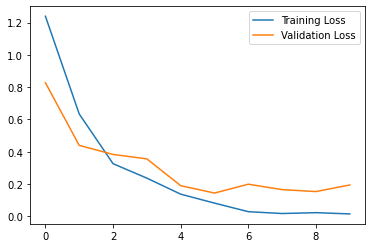

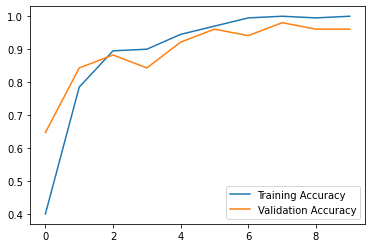

In [62]:
#Metrics and Visualization 
# Accessing the loss and accuracy values
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()


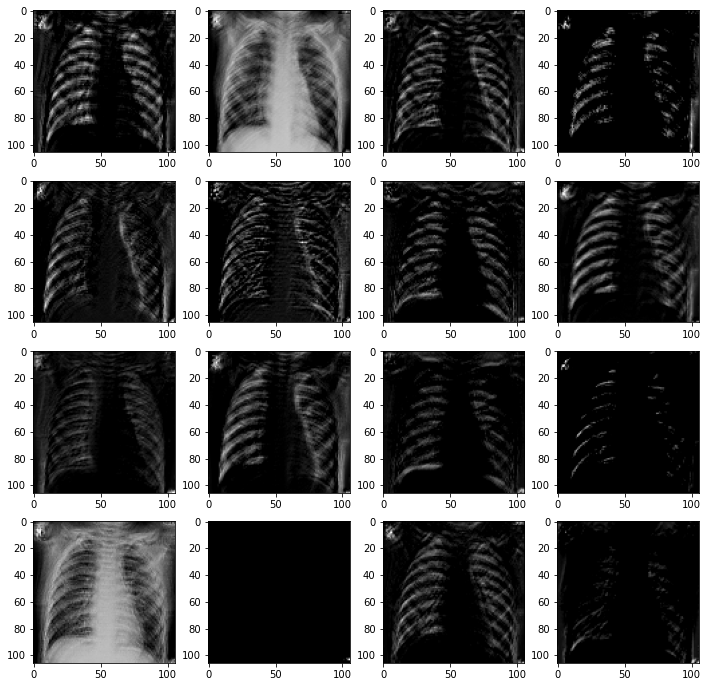

In [63]:
from tensorflow.keras.models import Model
# Define the input image
input_image = train_images[1]

# Reshape the input image to match the input shape of the model
input_image = np.expand_dims(input_image, axis=0)

# Define the input tensor
input_tensor = model.input

# Define a list of output tensors for each layer in the model
layer_outputs = [layer.output for layer in model.layers]

# Create a new model that outputs the activations of the 2nd convolutional layer
activation_model = Model(inputs=input_tensor, outputs=layer_outputs[2])

# Get the activations of the 2nd convolutional layer for the input image
activations = activation_model.predict(input_image)

# Plot the activation maps for the 2nd convolutional layer
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        axs[i][j].imshow(activations[0][:, :, i*4+j],cmap='gray')
plt.show()

### Model-1 inspired from lenet-5

changes:
1. extra conv+pool added 7X7 
2. depth size for 3X3 added.

{'conv1_units': 12,
 'conv2_units': 96,
 'conv3_units': 192,
 'dense1_units': 288,
 'dense2_units': 224}

In [68]:
# Define the model-1 model
model = Sequential()

# Convolutional layers
model.add(Conv2D(12, kernel_size=(7, 7), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(192, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(288, activation='relu'))
model.add(Dense(224, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 218, 218, 12)      600       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 12)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 96)      28896     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 52, 52, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 192)       166080    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 192)     

In [70]:
history=model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
7/7 [==============================] - 16s 2s/step - loss: 0.2856 - accuracy: 0.8950 - val_loss: 0.3148 - val_accuracy: 0.9216
Epoch 2/10
7/7 [==============================] - 16s 2s/step - loss: 0.2093 - accuracy: 0.9450 - val_loss: 0.3378 - val_accuracy: 0.8431
Epoch 3/10
7/7 [==============================] - 16s 2s/step - loss: 0.1985 - accuracy: 0.9350 - val_loss: 0.2899 - val_accuracy: 0.9020
Epoch 4/10
7/7 [==============================] - 16s 2s/step - loss: 0.1577 - accuracy: 0.9450 - val_loss: 0.1484 - val_accuracy: 0.9412
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.1958 - accuracy: 0.9250 - val_loss: 0.1937 - val_accuracy: 0.9020
Epoch 6/10
7/7 [==============================] - 16s 2s/step - loss: 0.1841 - accuracy: 0.9350 - val_loss: 0.3196 - val_accuracy: 0.8431
Epoch 7/10
7/7 [==============================] - 15s 2s/step - loss: 0.1519 - accuracy: 0.9350 - val_loss: 0.1503 - val_accuracy: 0.9216
Epoch 8/10
7/7 [==================

In [71]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

3/3 [==============================] - 1s 299ms/step - loss: 0.5075 - accuracy: 0.8333
Test accuracy: 0.8333333134651184


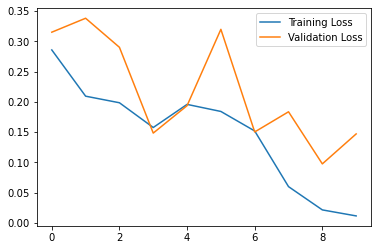

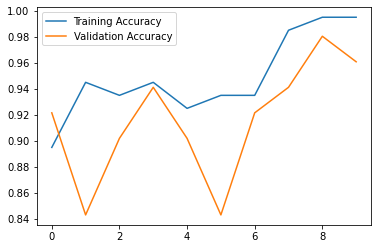

In [72]:
#Metrics and Visualization 
# Accessing the loss and accuracy values
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

### RandomSearch Tuner implementation for model-1 to find best set of hyperparameters

In [62]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv1_units', min_value=4, max_value=64, step=4),
                     kernel_size=(7, 7),
                     activation='relu',
                     input_shape=(224, 224, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(hp.Int('conv2_units', min_value=8, max_value=128, step=8),
                     kernel_size=(5, 5),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(hp.Int('conv3_units', min_value=16, max_value=256, step=16),
                     kernel_size=(3, 3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(hp.Int('dense1_units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dense(hp.Int('dense2_units', min_value=32, max_value=512, step=32),
                    activation='relu'))

    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_directory',
    project_name='lenet5_tuner'
)

# Perform the search
tuner.search(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 02m 09s]
val_accuracy: 0.9803921580314636

Best val_accuracy So Far: 0.9803921580314636
Total elapsed time: 01h 55m 24s
INFO:tensorflow:Oracle triggered exit


In [67]:
# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'conv1_units': 12,
 'conv2_units': 96,
 'conv3_units': 192,
 'dense1_units': 288,
 'dense2_units': 224}

## 1. U-net 

#### Image Denoising by corrupting Lungs x-ray images with random noise

##### Overview of U-net
The U-Net architecture consists of an encoder-decoder structure with skip connections. Let's explore its components and working principles:

1. Encoder Path:
   - The encoder path, also known as the contracting path, takes the input image and progressively reduces its spatial dimensions while capturing high-level features.
   - It typically comprises a series of convolutional layers followed by non-linear activation functions such as ReLU (Rectified Linear Unit) and pooling layers like max pooling.
   - The convolutional layers extract feature maps by convolving small filters across the input image, capturing increasingly complex patterns and semantic information.
   - The pooling layers reduce the spatial dimensions of the feature maps, enabling the network to capture more global context.

2. Decoder Path:
   - The decoder path, also referred to as the expanding path, takes the encoded features from the encoder and gradually upsamples them to generate the segmentation map.
   - It consists of upsampling layers, such as transpose convolutions or upsampling followed by regular convolutions, to increase the spatial dimensions of the feature maps.
   - The feature maps from the encoder path are also combined with the upsampled feature maps using skip connections, creating a bridge between the encoder and decoder.
   - Skip connections concatenate or add the feature maps from the corresponding encoder and decoder levels, allowing the decoder to access both high-level semantics and fine-grained details.

3. Skip Connections:
   - Skip connections are a crucial component of U-Net, enabling the network to bypass information loss caused by downsampling in the encoder path.
   - By incorporating skip connections, the decoder path has access to feature maps at multiple scales, facilitating the fusion of high-level semantic information with fine-grained local details.
   - Skip connections help preserve spatial information and aid in precise localization, especially when segmenting small or intricate structures.

4. Bottleneck:
   - U-Net contains a bottleneck layer that sits at the bottom of the architecture, typically represented by a single convolutional layer.
   - The bottleneck layer acts as a bridge between the encoder and decoder, capturing the most compressed representation of the input features.
   - It helps to reduce the number of parameters and allows the network to aggregate global context before upsampling and generating the final segmentation map.

5. Output Layer:
   - The U-Net architecture ends with an output layer that produces the segmentation map.
   - Depending on the number of classes in the segmentation task, the output layer usually consists of a 1x1 convolutional layer followed by an activation function such as softmax.
   - The number of output channels in the final layer corresponds to the number of classes being segmented.

U-Net's symmetric architecture and skip connections facilitate the learning of both global and local features, making it effective for segmenting objects and preserving fine details. It has been widely used in various segmentation tasks, including biomedical image segmentation, road detection, cell segmentation, and more.

I hope this explanation helps you understand the key components and working principles of the U-Net architecture. If you have any further questions, feel free to ask!

### Data Loading and Preprocessing

In [28]:
train_path = '../data/archive/data/train/'
test_path = '../data/archive/data/test/'

In [92]:
def load_images_from_folder(folder_path, target_shape):
    images = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):  # Check if subfolder is a directory
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    # Resize the image to the target shape
                    resized_image = cv2.resize(image, target_shape)
                    images.append(resized_image)
    return images

def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        # Normalize pixel values to [0, 1]
        normalized_image = image / 255.0
        preprocessed_images.append(normalized_image)
    return np.array(preprocessed_images)

In [93]:
target_shape = (256, 256)  # Specify the desired target shape for resizing
train_images = load_images_from_folder(train_path, target_shape)
test_images = load_images_from_folder(test_path, target_shape)

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

### Image Corruption 

In [97]:
def add_noise(image, noise_type='random', noise_level=0.1):
    if noise_type == 'random':
        noise = np.random.normal(scale=noise_level, size=image.shape)
        noisy_image = image + noise
        # Clip the pixel values to the valid range [0, 1]
        noisy_image = np.clip(noisy_image, 0, 1)
        return noisy_image
    elif noise_type == 'other':
        # Add other types of noise here
        # Example: Gaussian noise, salt and pepper noise, etc.
        # Make sure to clip the pixel values to the valid range [0, 1]
        pass
    else:
        raise ValueError("Unsupported noise type")

In [98]:
# Example usage:
corrupted_train_images = [add_noise(image, noise_type='random', noise_level=0.1) for image in train_images]
corrupted_test_images = [add_noise(image, noise_type='random', noise_level=0.1) for image in test_images]

In [99]:
len(corrupted_train_images)

251

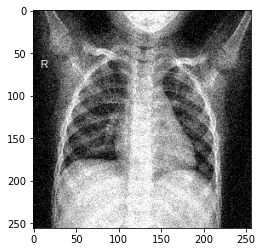

In [100]:
plt.imshow(corrupted_train_images[0],cmap='gray')

### Input engineering for Unet

In [101]:
def reshape_images(images, target_shape):
    reshaped_images = []
    for image in images:
        resized_image = cv2.resize(image, target_shape)
        reshaped_images.append(resized_image)
    return np.array(reshaped_images)

# Reshape corrupted train images
input_shape = (256, 256)
reshaped_corrupted_train_images = reshape_images(corrupted_train_images, input_shape)

# Reshape corrupted test images
reshaped_corrupted_test_images = reshape_images(corrupted_test_images, input_shape)

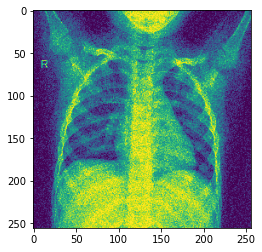

In [102]:
plt.imshow(reshaped_corrupted_train_images[0])

In [103]:
def normalize_images(images):
    normalized_images = images.astype('float32') / 255.0
    return normalized_images

# Normalize reshaped corrupted train images
normalized_corrupted_train_images = normalize_images(reshaped_corrupted_train_images)

# Normalize reshaped corrupted test images
normalized_corrupted_test_images = normalize_images(reshaped_corrupted_test_images)

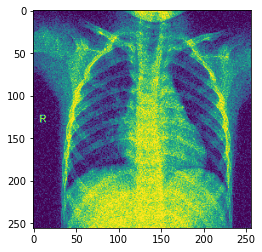

In [104]:
plt.imshow(normalized_corrupted_test_images[0])

## U-net

In [118]:
from tensorflow import keras
from tensorflow.keras import layers

def unet_denoise(input_shape):
    # Encoder
    inputs = keras.Input(shape=input_shape)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = layers.UpSampling2D(size=(2, 2))(conv4)
    up5 = layers.Conv2D(256, 2, activation='relu', padding='same')(up5)
    merge5 = layers.concatenate([conv3, up5], axis=3)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge5)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = layers.UpSampling2D(size=(2, 2))(conv5)
    up6 = layers.Conv2D(128, 2, activation='relu', padding='same')(up6)
    merge6 = layers.concatenate([conv2, up6], axis=3)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    up7 = layers.Conv2D(64, 2, activation='relu', padding='same')(up7)
    merge7 = layers.concatenate([conv1, up7], axis=3)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv7)

    model = keras.Model(inputs=inputs, outputs=output)
    return model

In [119]:
input_shape=(256,256,1)

model = unet_denoise(input_shape)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_90 (Conv2D)             (None, 256, 256, 64  640         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_91 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_90[0][0]']              
                                )                                                           

In [120]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    corrupted_train_images,
    original_train_images,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/5
13/13 [==============================] - 307s 24s/step - loss: 0.0756 - val_loss: 0.0947
Epoch 2/5
13/13 [==============================] - 330s 25s/step - loss: 0.0740 - val_loss: 0.1825
Epoch 3/5
13/13 [==============================] - 350s 27s/step - loss: 0.0802 - val_loss: 0.0935
Epoch 4/5
13/13 [==============================] - 322s 25s/step - loss: 0.0752 - val_loss: 0.0925
Epoch 5/5
13/13 [==============================] - 319s 25s/step - loss: 0.0739 - val_loss: 0.0871


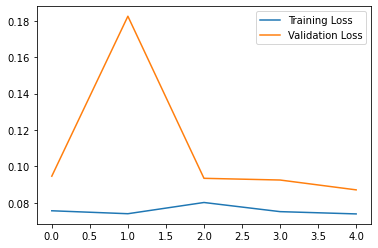

In [122]:
#Metrics and Visualization 
# Accessing the loss and accuracy values
train_loss = history.history['loss']
#train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
#val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [127]:
#saving model
model.save('../models/unet_img_denoising_model.h5')

In [134]:
# Convert input data to TensorFlow tensors
corrupted_test_images = tf.convert_to_tensor(normalized_corrupted_test_images)

In [173]:
# Use the model to make predictions on the test images
denoised_images = model.predict(corrupted_test_images)

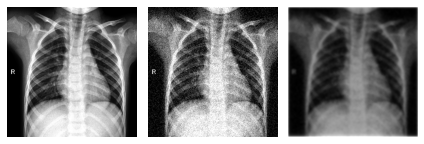

In [174]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3)

# Display the first image in the first subplot
axs[0].imshow(test_images[0], cmap='gray')
axs[0].axis('off')  # Turn off axis labels and ticks

# Display the second image in the second subplot
axs[1].imshow(corrupted_test_images[0], cmap='gray')
axs[1].axis('off')

# Display the third image in the third subplot
axs[2].imshow(denoised_images[0], cmap='gray')
axs[2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [175]:
result = model.evaluate(test_images, denoised_images)

3/3 [==============================] - 39s 10s/step - loss: 0.1569


In [176]:
result

0.15690158307552338

In [147]:
# Create a folder to save the equalized images
output_folder = "../outputs/equalized_images"
os.makedirs(output_folder, exist_ok=True)

# Perform histogram equalization on the denoised images and save them
for i in range(len(denoised_images)):
    # Convert the denoised image to grayscale
    gray_image = cv2.cvtColor(denoised_images[i], cv2.COLOR_BGR2GRAY)

    # Perform histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)

    # Save the equalized image
    output_path = os.path.join(output_folder, f"equalized_image_{i}.png")
    cv2.imwrite(output_path, equalized_image)

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x7123906f::Set<1,-1,-1>,struct cv::impl::A0x7123906f::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [177]:
denoised_images.shape

(66, 256, 256, 1)

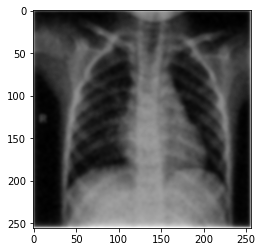

In [179]:
plt.imshow(denoised_images[0],cmap='gray')

In [149]:
# Perform histogram equalization
equalized_image = cv2.equalizeHist(denoised_images[0])

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [180]:
from skimage.metrics import structural_similarity as compare_ssim

def compare_images(image1, image2):
    # Resize the images to a consistent size for comparison
    image1 = cv2.resize(image1, (256, 256))
    image2 = cv2.resize(image2, (256, 256))
    # Calculate the Structural Similarity Index (SSIM)
    ssim_score, _ = compare_ssim(image1, image2, full=True)

    # Calculate the Mean Squared Error (MSE)
    mse_score = np.mean((image1 - image2) ** 2)

    return ssim_score, mse_score

In [181]:
# Load the images for comparison
image1 = test_images[0]
image2 = denoised_images[0]

# Compare the images
ssim_score, mse_score = compare_images(image1, image2)

# Print the similarity scores
print('SSIM score:', ssim_score)
print('MSE score:', mse_score)

SSIM score: 0.3803478070811383
MSE score: 0.09097702907840664


C:\Users\NILAYN~1\AppData\Local\Temp/ipykernel_22840/3293973156.py:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_score, _ = compare_ssim(image1, image2, full=True)


## 2. Autoencoders

Denoising autoencoders are a type of artificial neural network specifically designed for image denoising tasks. They are based on the concept of autoencoders, which are neural networks used for data compression and reconstruction.

The architecture of a denoising autoencoder consists of two main components: an encoder and a decoder. The encoder takes an input image, which is typically corrupted by noise, and maps it to a lower-dimensional representation called a code or latent space. The decoder then takes this code and reconstructs the clean image from it.

The key idea behind denoising autoencoders is that by training them on pairs of noisy and clean images, the network learns to capture the underlying structure and patterns of the clean images while filtering out the noise. During training, the encoder and decoder are optimized to minimize the difference between the reconstructed image and the corresponding clean image.

To train a denoising autoencoder, the following steps are typically followed:

1. Noisy Image Generation: Generate a dataset of pairs consisting of clean images and their corresponding noisy versions. The noise can be artificially added to the clean images using various methods, such as adding random pixel values or applying specific noise models.

2. Network Architecture: Design the architecture of the denoising autoencoder, which includes determining the number of layers, the size of the latent space, and the types of neural network layers used (e.g., convolutional layers for image data).

3. Training: Train the denoising autoencoder using the dataset of pairs. The network learns to map the noisy input images to the clean output images by adjusting the weights and biases of its layers through an optimization algorithm such as gradient descent.

Once the denoising autoencoder is trained, it can be used for denoising new, unseen images. The process involves feeding a noisy image into the trained network, which then applies its learned mapping to reconstruct the clean version of the image. The denoising autoencoder effectively filters out the noise present in the input image, resulting in a denoised output image.

Denoising autoencoders have been widely used in various applications, including image denoising, image restoration, and computer vision tasks. They offer an effective and data-driven approach to remove noise from images, and their ability to learn from pairs of noisy and clean images makes them particularly suited for denoising tasks.

In [215]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import time

In [217]:
def build_autoencoder(input_shape):
    # Encoder
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    #x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
     #= MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    #x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    #x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(inputs, decoded)
    return autoencoder

In [218]:
def loss_function(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss=loss_function)

In [219]:
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_120 (Conv2D)         (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_122 (Conv2D)         (None, 64, 64, 64)        3692

In [220]:

# Preprocess your data, including adding noise to the images


# Split the data into training and testing sets

# Train the denoising autoencoder
st = time.time()
history = autoencoder.fit(normalized_corrupted_train_images, original_train_images, 
                epochs=5, 
                batch_size=32, 
                validation_data=(normalized_corrupted_test_images, test_images))
et = time.time()
execution_time = et - st
print(f"The fit_function took {execution_time:.2f} seconds to execute.")

Epoch 1/5
8/8 [==============================] - 40s 5s/step - loss: 0.0796 - val_loss: 0.0802
Epoch 2/5
8/8 [==============================] - 38s 5s/step - loss: 0.0794 - val_loss: 0.0798
Epoch 3/5
8/8 [==============================] - 39s 5s/step - loss: 0.0784 - val_loss: 0.0774
Epoch 4/5
8/8 [==============================] - 38s 5s/step - loss: 0.0737 - val_loss: 0.0711
Epoch 5/5
8/8 [==============================] - 38s 5s/step - loss: 0.0619 - val_loss: 0.0520
The fit_function took 194.62 seconds to execute.


In [221]:
autoencoder.count_params()

74497

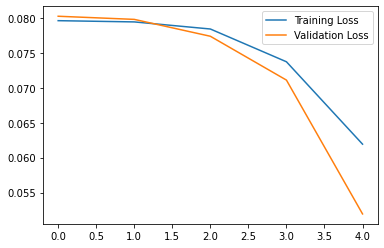

In [223]:
#Metrics and Visualization 
# Accessing the loss and accuracy values
train_loss = history.history['loss']
#train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
#val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [224]:
autoencoder.save('../models/denoised_autoencoder.h5')

In [225]:
# Use the model to make predictions on the test images
denoised_images = autoencoder.predict(normalized_corrupted_test_images)

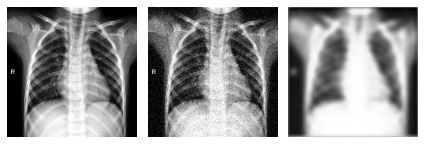

In [226]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3)

# Display the first image in the first subplot
axs[0].imshow(test_images[0], cmap='gray')
axs[0].axis('off')  # Turn off axis labels and ticks

# Display the second image in the second subplot
axs[1].imshow(normalized_corrupted_test_images[0], cmap='gray')
axs[1].axis('off')

# Display the third image in the third subplot
axs[2].imshow(denoised_images[0], cmap='gray')
axs[2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [228]:
# Load the images for comparison
image1 = test_images[1]
image2 = denoised_images[1]

# Compare the images
ssim_score, mse_score = compare_images(image1, image2)

# Print the similarity scores
print('SSIM score:', ssim_score)
print('MSE score:', mse_score)

SSIM score: 0.5033535155269969
MSE score: 0.06284894380900669


C:\Users\NILAYN~1\AppData\Local\Temp/ipykernel_22840/3293973156.py:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_score, _ = compare_ssim(image1, image2, full=True)


In [229]:
scores=[]

for im1,im2 in zip(test_images,denoised_images):
    scores.append(compare_images(im1,im2))

C:\Users\NILAYN~1\AppData\Local\Temp/ipykernel_22840/3293973156.py:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_score, _ = compare_ssim(image1, image2, full=True)


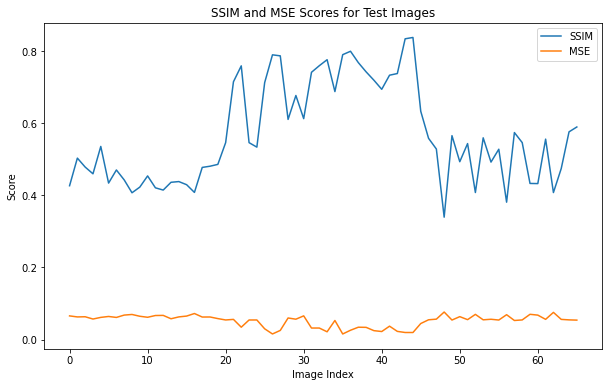

In [234]:
# Extract SSIM and MSE scores
ssim_scores = [score[0] for score in scores]
mse_scores = [score[1] for score in scores]

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(ssim_scores, label='SSIM')
plt.plot(mse_scores, label='MSE')
plt.xlabel('Image Index')
plt.ylabel('Score')
plt.title('SSIM and MSE Scores for Test Images')
plt.legend()
plt.show()

In [235]:
# Calculate statistics
ssim_mean = np.mean(ssim_scores)
mse_mean = np.mean(mse_scores)
ssim_max = np.max(ssim_scores)
mse_max = np.max(mse_scores)
ssim_min = np.min(ssim_scores)
mse_min = np.min(mse_scores)

# Print statistics
print("SSIM statistics:")
print("Mean: ", ssim_mean)
print("Max: ", ssim_max)
print("Min: ", ssim_min)
print()
print("MSE statistics:")
print("Mean: ", mse_mean)
print("Max: ", mse_max)
print("Min: ", mse_min)

SSIM statistics:
Mean:  0.5691303875594778
Max:  0.8379634834703746
Min:  0.33953785265461983

MSE statistics:
Mean:  0.05195515114145599
Max:  0.0764470141525366
Min:  0.015564395886172033


In [232]:
result = model.evaluate(test_images, denoised_images)

3/3 [==============================] - 42s 11s/step - loss: 0.1143


In [236]:
result

0.11427284777164459

## 3. U-net with Attention

In [238]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mean_squared_error

In [240]:
def attention_unet(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    # Attention gate
    att = Conv2D(64, (1, 1), activation='relu', padding='same')(pool1)
    att = Conv2D(64, (1, 1), activation='relu', padding='same')(att)
    att = Conv2D(64, (1, 1), activation='sigmoid', padding='same')(att)
    att = tf.keras.layers.Multiply()([pool1, att])

    # Decoder
    up1 = Concatenate()([UpSampling2D((2, 2))(att), conv1]) #upsample then merge
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv2)

    # U-Net model
    unet = Model(inputs, conv2)
    return unet

In [241]:
def loss_function(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

unet = attention_unet(input_shape)
unet.compile(optimizer='adam', loss=loss_function)
unet.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_125 (Conv2D)            (None, 256, 256, 64  640         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_126 (Conv2D)            (None, 256, 256, 64  36928       ['conv2d_125[0][0]']             
                                )                                                          

In [256]:
# Preprocess your data, including adding noise to the images

# Split the data into training and testing sets

st=time.time()
# Train the U-Net model
history = unet.fit(normalized_corrupted_train_images, original_train_images, 
         epochs=5, 
         batch_size=32, 
         validation_data=(normalized_corrupted_test_images, test_images))
et = time.time()
execution_time = et - st
print(f"The fit_function took {execution_time:.2f} seconds to execute")

Epoch 1/5
8/8 [==============================] - 140s 18s/step - loss: 0.0039 - val_loss: 0.0040
Epoch 2/5
8/8 [==============================] - 146s 18s/step - loss: 0.0038 - val_loss: 0.0038
Epoch 3/5
8/8 [==============================] - 152s 19s/step - loss: 0.0037 - val_loss: 0.0037
Epoch 4/5
8/8 [==============================] - 150s 19s/step - loss: 0.0036 - val_loss: 0.0037
Epoch 5/5
8/8 [==============================] - 165s 21s/step - loss: 0.0036 - val_loss: 0.0036
The fit_function took 751.68 seconds to execute


In [257]:
unet.save('../models/unet_with_attention.h5')

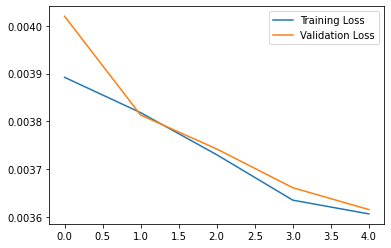

In [259]:
#Metrics and Visualization 
# Accessing the loss and accuracy values
train_loss = history.history['loss']
#train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
#val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [260]:
# Generate denoised images using the U-Net
denoised_images_unet = unet.predict(normalized_corrupted_test_images)

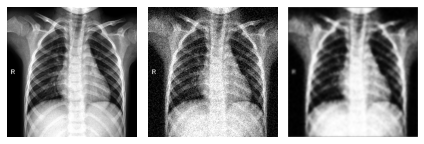

In [262]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3)

# Display the first image in the first subplot
axs[0].imshow(test_images[0], cmap='gray')
axs[0].axis('off')  # Turn off axis labels and ticks

# Display the second image in the second subplot
axs[1].imshow(normalized_corrupted_test_images[0], cmap='gray')
axs[1].axis('off')

# Display the third image in the third subplot
axs[2].imshow(denoised_images_unet[0], cmap='gray')
axs[2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [264]:
scores=[]

for im1,im2 in zip(test_images,denoised_images_unet):
    scores.append(compare_images(im1,im2))

C:\Users\NILAYN~1\AppData\Local\Temp/ipykernel_22840/3293973156.py:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_score, _ = compare_ssim(image1, image2, full=True)


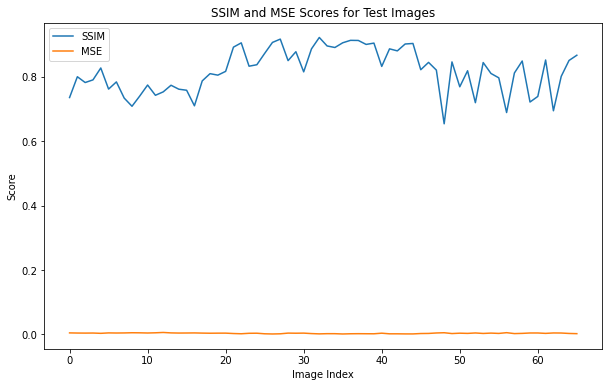

In [265]:
# Extract SSIM and MSE scores
ssim_scores = [score[0] for score in scores]
mse_scores = [score[1] for score in scores]

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(ssim_scores, label='SSIM')
plt.plot(mse_scores, label='MSE')
plt.xlabel('Image Index')
plt.ylabel('Score')
plt.title('SSIM and MSE Scores for Test Images')
plt.legend()
plt.show()

In [266]:
# Calculate statistics
ssim_mean = np.mean(ssim_scores)
mse_mean = np.mean(mse_scores)
ssim_max = np.max(ssim_scores)
mse_max = np.max(mse_scores)
ssim_min = np.min(ssim_scores)
mse_min = np.min(mse_scores)

# Print statistics
print("SSIM statistics:")
print("Mean: ", ssim_mean)
print("Max: ", ssim_max)
print("Min: ", ssim_min)
print()
print("MSE statistics:")
print("Mean: ", mse_mean)
print("Max: ", mse_max)
print("Min: ", mse_min)

SSIM statistics:
Mean:  0.8182687885146238
Max:  0.9217905642988766
Min:  0.6538399103231534

MSE statistics:
Mean:  0.0036155064765122395
Max:  0.0061979704048619345
Min:  0.0015124056501892597


In [267]:
result = model.evaluate(test_images, denoised_images_unet)

3/3 [==============================] - 18s 5s/step - loss: 0.1338


In [268]:
result

0.13380368053913116